# Navier-Stokes with multiple bodies

In [18]:
using ViscousFlow
using Plots
using RigidBodyTools
using ConstrainedSystems
using CartesianGrids
using GridUtilities

In [19]:
using Plots
pyplot()
default(grid = false)

LoadError: InitError: PyError (PyImport_ImportModule

The Python package matplotlib could not be imported by pyimport. Usually this means
that you did not install matplotlib in the Python version being used by PyCall.

PyCall is currently configured to use the Python version at:

/usr/bin/python3

and you should use whatever mechanism you usually use (apt-get, pip, conda,
etcetera) to install the Python package containing the matplotlib module.

One alternative is to re-configure PyCall to use a different Python
version on your system: set ENV["PYTHON"] to the path/name of the python
executable you want to use, run Pkg.build("PyCall"), and re-launch Julia.

Another alternative is to configure PyCall to use a Julia-specific Python
distribution via the Conda.jl package (which installs a private Anaconda
Python distribution), which has the advantage that packages can be installed
and kept up-to-date via Julia.  As explained in the PyCall documentation,
set ENV["PYTHON"]="", run Pkg.build("PyCall"), and re-launch Julia. Then,
To install the matplotlib module, you can use `pyimport_conda("matplotlib", PKG)`,
where PKG is the Anaconda package the contains the module matplotlib,
or alternatively you can use the Conda package directly (via
`using Conda` followed by `Conda.add` etcetera).

) <class 'ImportError'>
ImportError('\n\nIMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!\n\nImporting the numpy c-extensions failed.\n- Try uninstalling and reinstalling numpy.\n- If you have already done that, then:\n  1. Check that you expected to use Python3.7 from "/usr/bin/python3",\n     and that you have no directories in your PATH or PYTHONPATH that can\n     interfere with the Python and numpy version "1.17.4" you\'re trying to use.\n  2. If (1) looks fine, you can open a new issue at\n     https://github.com/numpy/numpy/issues.  Please include details on:\n     - how you installed Python\n     - how you installed numpy\n     - your operating system\n     - whether or not you have multiple versions of Python installed\n     - if you built from source, your compiler versions and ideally a build log\n\n- If you\'re working with a numpy git repository, try `git clean -xdf`\n  (removes all files not under version control) and rebuild numpy.\n\nNote: this error has many possible causes, so please don\'t comment on\nan existing issue about this - open a new one instead.\n\nOriginal error was: No module named \'numpy.core._multiarray_umath\'\n')
  File "/usr/lib/python3/dist-packages/matplotlib/__init__.py", line 138, in <module>
    from . import cbook, rcsetup
  File "/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py", line 31, in <module>
    import numpy as np
  File "/usr/lib/python3/dist-packages/numpy/__init__.py", line 142, in <module>
    from . import core
  File "/usr/lib/python3/dist-packages/numpy/core/__init__.py", line 47, in <module>
    raise ImportError(msg)

during initialization of module PyPlot

### Set up basic free stream

Set the flow parameters

In [20]:
Re = 200; # Reynolds number
U = 1.0; # Free stream velocity
U∞ = (U,0.0);

### Set up the bodies, their initial configuration, and their motion

In [21]:
bl = BodyList()
tl = RigidTransform[]
ml = RigidBodyMotion[]

RigidBodyMotion[]

#### Body 1

Set up points on the body. Here is a plate:

In [22]:
n = 51;
body1 = Plate(1.0,n)

Plate with 51 points and length 1.0 and thickness 0.0
   Current position: (0.0,0.0)
   Current angle (rad): 0.0


set the initial configuration

In [23]:
let
    cent = (1.0,-1.0) #1.0+1.0im
    α = 0.0 #-π/3 #-π/4
    global T1 = RigidTransform(cent,α)
end
T1(body1) # transform the body to the current configuration

Plate with 51 points and length 1.0 and thickness 0.0
   Current position: (1.0,-1.0)
   Current angle (rad): 0.0


In [24]:
push!(tl,T1)

1-element Array{RigidTransform,1}:
 Rigid-body transform
  Translation: (1.0,-1.0)
  Rotation angle (rad): 0.0


Push this body onto the list

In [25]:
push!(bl,deepcopy(body1))

1-element Array{Body,1}:
 Plate with 51 points and length 1.0 and thickness 0.0
   Current position: (1.0,-1.0)
   Current angle (rad): 0.0


and set the motion

In [26]:
let a = 0.25, # location of pitch axis, a = 0.5 is leading edge
    ϕp = -π/2,  # phase lag of pitch
    ϕh = 0.0,  # phase lag of heave
    A = 0.25,  # amplitude/chord
    fstar = 1/π, # fc/U
    α₀ = 0, # mean angle of attack
    Δα = 10π/180, # amplitude of pitching
    U₀ = 0.0, # translational motion (set to zero in place of free stream)
    K = π*fstar # reduced frequency, K = πfc/U

    oscil1 = RigidBodyTools.PitchHeave(U₀,a,K,ϕp,α₀,Δα,A,ϕh);
    global motion1 = RigidBodyMotion(oscil1)
end

Rigid Body Motion:
  ċ = 0.0 - 0.09im
  c̈ = 0.03 - 1.0im
  α̇ = 0.35
  α̈ = 0.0
  Oscillatory pitch-heave kinematics with
     Reduced frequency K = 1.0
     Heaving amplitude A = 0.25
     Pitching amplitude Δα = 0.17453292519943295
     Pitch lag ϕp = -1.5707963267948966
     Heave lag ϕh = 0.0


In [27]:
push!(ml,motion1)

1-element Array{RigidBodyMotion,1}:
 Rigid Body Motion:
  ċ = 0.0 - 0.09im
  c̈ = 0.03 - 1.0im
  α̇ = 0.35
  α̈ = 0.0
  Oscillatory pitch-heave kinematics with
     Reduced frequency K = 1.0
     Heaving amplitude A = 0.25
     Pitching amplitude Δα = 0.17453292519943295
     Pitch lag ϕp = -1.5707963267948966
     Heave lag ϕh = 0.0


#### Body 2

Let us also add a NACA 0012 airfoil

In [28]:
n = 50;
body2 = NACA4(0.0,0.0,0.12,np=n)

LoadError: StackOverflowError:

In [29]:
let
    cent = (2.0,1.0)
    α = -π/4
    global T2 = RigidTransform(cent,α)
end
T2(body2) # transform the body to the current configuration

LoadError: UndefVarError: body2 not defined

In [30]:
push!(tl,T2)
#tl[2] = T2

2-element Array{RigidTransform,1}:
 Rigid-body transform
  Translation: (1.0,-1.0)
  Rotation angle (rad): 0.0

 Rigid-body transform
  Translation: (2.0,1.0)
  Rotation angle (rad): -0.7853981633974483


In [31]:
push!(bl,deepcopy(body2));

LoadError: UndefVarError: body2 not defined

In [32]:
let a = 0.25, # location of pitch axis, a = 0.5 is leading edge
    ϕp = π/2,  # phase lag of pitch to heave
    ϕh = 0,  # phase lag of pitch to heave
    A = 0,  # amplitude/chord
    fstar = 1/π, # fc/U
    α₀ = 0, # mean angle of attack
    Δα = 0π/180, # amplitude of pitching
    U₀ = 0.0, # translational motion (set to zero in place of free stream)
    K = π*fstar # reduced frequency, K = πfc/U

    oscil1 = RigidBodyTools.PitchHeave(U₀,a,K,ϕp,α₀,Δα,A,ϕh);
    global motion2 = RigidBodyMotion(oscil1)
end

Rigid Body Motion:
  ċ = 0.0 + 0.0im
  c̈ = 0.0 + 0.0im
  α̇ = 0.0
  α̈ = 0.0
  Oscillatory pitch-heave kinematics with
     Reduced frequency K = 1.0
     Heaving amplitude A = 0.0
     Pitching amplitude Δα = 0.0
     Pitch lag ϕp = 1.5707963267948966
     Heave lag ϕh = 0.0


In [33]:
push!(ml,motion2);
#ml[2] = motion2

#### Body 3

Let us also add another NACA 0012 airfoil

In [34]:
let
    cent = (0.0,1.0)
    α = -π/4
    global T3 = RigidTransform(cent,α)
end
T3(body2) # transform the body to the current configuration

LoadError: UndefVarError: body2 not defined

In [35]:
push!(tl,T3)

3-element Array{RigidTransform,1}:
 Rigid-body transform
  Translation: (1.0,-1.0)
  Rotation angle (rad): 0.0

 Rigid-body transform
  Translation: (2.0,1.0)
  Rotation angle (rad): -0.7853981633974483

 Rigid-body transform
  Translation: (0.0,1.0)
  Rotation angle (rad): -0.7853981633974483


In [36]:
push!(bl,deepcopy(body2))

LoadError: UndefVarError: body2 not defined

In [37]:
let a = 0.25, # location of pitch axis, a = 0.5 is leading edge
    ϕp = π/2,  # phase lag of pitch
    ϕh = 0,  # phase lag of pitch
    A = 0.5,  # amplitude/chord
    fstar = 1/π, # fc/U
    α₀ = 0, # mean angle of attack
    Δα = 30π/180, # amplitude of pitching
    U₀ = 0.0, # translational motion (set to zero in place of free stream)
    K = π*fstar # reduced frequency, K = πfc/U

    oscil1 = RigidBodyTools.PitchHeave(U₀,a,K,ϕp,α₀,Δα,A,ϕh);
    global motion3 = RigidBodyMotion(oscil1)
end

Rigid Body Motion:
  ċ = 0.0 - 0.26im
  c̈ = 0.27 + 2.0im
  α̇ = 1.05
  α̈ = 0.0
  Oscillatory pitch-heave kinematics with
     Reduced frequency K = 1.0
     Heaving amplitude A = 0.5
     Pitching amplitude Δα = 0.5235987755982988
     Pitch lag ϕp = 1.5707963267948966
     Heave lag ϕh = 0.0


In [38]:
push!(ml,motion3);
#ml[3] = motion3

#### Plot the initial configuration of the bodies

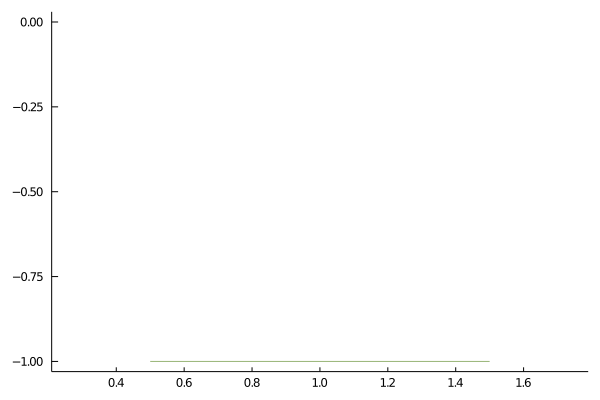

In [39]:
plot(bl)

#### Collect the inertial coordinates body Lagrange points into a single structure

In [40]:
numpts(bl)

51

In [41]:
X = VectorData(collect(bl));

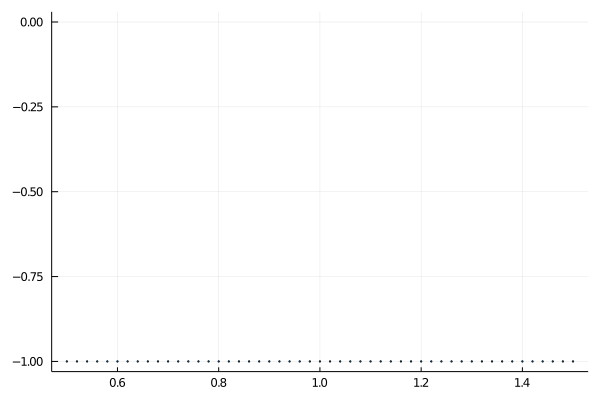

In [42]:
scatter(X.u,X.v,markersize=1,legend=:false)

#### We can use the `view` function to parse data structures into bodies

In [43]:
f = ScalarData(X)
fill!(f,1.0);

In [44]:
f2 = view(f,bl,2)
fill!(f2,-2.0)
plot(f)

LoadError: Unavailable body

In [45]:
V = VectorData(X)
assign_velocity!(V,X,bl,tl,ml,0.5)

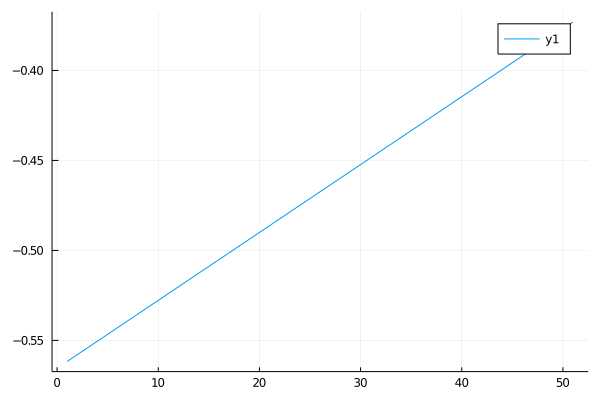

In [46]:
plot(view(V.v,bl,1))

#### Let's make a tool for visualizing the prescribed motion of the bodies
Note that this uses the Plots package.

In [47]:
function animate(bl::BodyList,ml::Vector{RigidBodyMotion},tl::Vector{RigidTransform};timestep=0.05,tfinal=1,kwargs...)
    length(bl) == length(ml) == length(tl) || error("Incorrect length of body list")
    
    bltmp = deepcopy(bl)
    
    r₁(u,t) = ConstrainedSystems.r₁(u,t,ml)
    Δt = timestep
    stepper = RK(u₀,Δt,r₁)

    u = vec(tl)
    t = 0.0
    anim = @animate for ti in Δt:Δt:tfinal
        t, u = stepper(t,u)
    
        icnt = 0
        for ib = 1:length(bl)
            T = RigidTransform((u[icnt+1],u[icnt+2]),u[icnt+3])
            T(bltmp[ib])
            icnt += 3
        end
        plot(bltmp;kwargs...)
        end
    return anim
    
end

animate (generic function with 1 method)

Set up the state vector:

In [48]:
u₀ = vec(tl);

In [49]:
anim = animate(bl,ml,tl,tfinal=4,xlim=(-1,3),ylim=(-2,2))

LoadError: Incorrect length of body list

In [50]:
gif(anim, fps = 60)

LoadError: UndefVarError: anim not defined

#### Set up the domain

In [51]:
xlim = (-1.0,3.0)
ylim = (-2.0,2.0)

(-2.0, 2.0)

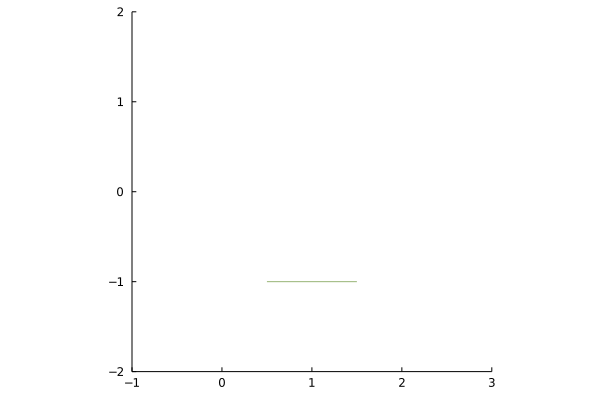

In [52]:
plot(bl,xlim=xlim,ylim=ylim)

#### Set the domain size and time step size

In [53]:
Δx = 0.0203;
Δt = min(0.5*Δx,0.5*Δx^2*Re);

### Now set up the system

Set up the state vector and constraint force vector for a static body

In [54]:
sys = NavierStokes(Re,Δx,xlim,ylim,Δt,U∞ = U∞, X̃ = X,isstore=true)

Navier-Stokes system on a grid of size 200 x 200

In [55]:
w₀ = Nodes(Dual,size(sys));
f = VectorData(X);
xg, yg = coordinates(w₀,dx=Δx,I0=origin(sys))

(-1.02515:0.0203:3.01455, -2.01985:0.0203:2.01985)

Set up the integrator here

In [56]:
plan_intfact(t,u) = CartesianGrids.plan_intfact(t,u,sys)
plan_constraints(u,t) = ConstrainedSystems.plan_constraints(u,t,sys)
r₁(u,t) = ConstrainedSystems.r₁(u,t,sys)
r₂(u,t) = ConstrainedSystems.r₂(u,t,sys)


@time solver = IFHERK(w₀,f,sys.Δt,plan_intfact,plan_constraints,(r₁,r₂),rk=ConstrainedSystems.RK31)

  6.126415 seconds (19.34 M allocations: 1.712 GiB, 6.21% gc time)


Order-3 IF-HERK integrator with
   State of type Nodes{Dual,200,200,Float64,Array{Float64,2}}
   Force of type VectorData{51,Float64,Array{Float64,1}}
   Time step size 0.01015


Initialize the state vector and the history vectors

In [57]:
t = 0.0
w₀ .= 0.0
u = deepcopy(w₀)

fx = [Float64[] for b in bl];
fy = [Float64[] for b in bl];
thist = Float64[];

uhist = [];
tsample = 0.2; # rate at which to store field data

### Advance the system!

Set the time range to integrate over.

In [58]:
tf = 5.0;
T = Δt:Δt:tf;

In [59]:
### NEED TO DEVELOP A SUMMATION FUNCTION THAT PARSES POINT DATA INTO BODIES...

In [60]:
Base.sum(f::AbstractVector,bl::BodyList,i::Int) = sum(view(f,bl,i))

In [61]:
for ti in T
    global t, u, f = solver(t,u)
    
    push!(thist,t)
    for i in 1:length(bl)
        push!(fx[i],sum(f.u,bl,i)*Δx^2)
        push!(fy[i],sum(f.v,bl,i)*Δx^2)
    end
    #(isapprox(mod(t,tsample),0,atol=1e-6) || isapprox(mod(t,tsample),tsample,atol=1e-6)) ? push!(uhist,deepcopy(u)) : nothing
    push!(uhist,deepcopy(u))
end
println("solution completed through time t = ",t)

solution completed through time t = 4.993800000000018


#### Plotting

Basic plot

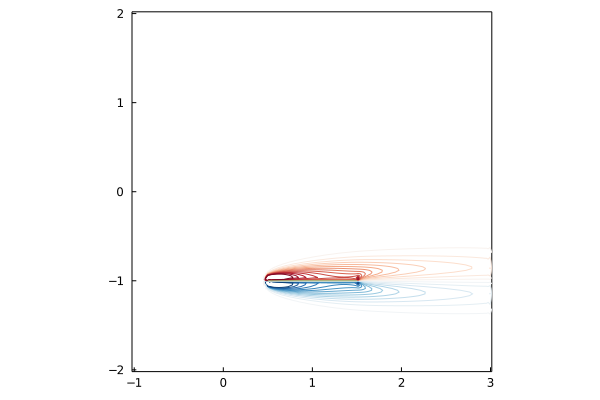

In [62]:
plot(xg,yg,vorticity(uhist[end],sys),levels=range(-10,10,length=30), color = :RdBu,clim=(-10,10))
plot!(bl)

Make a movie

┌ Info: Saved animation to 
│   fn = /home/sinan/Documents/turbulence/ViscousFlow.jl/examples/tmp.gif
└ @ Plots /home/sinan/.julia/packages/Plots/vsE7b/src/animation.jl:104


Plots.AnimatedGif("/home/sinan/Documents/turbulence/ViscousFlow.jl/examples/tmp.gif")
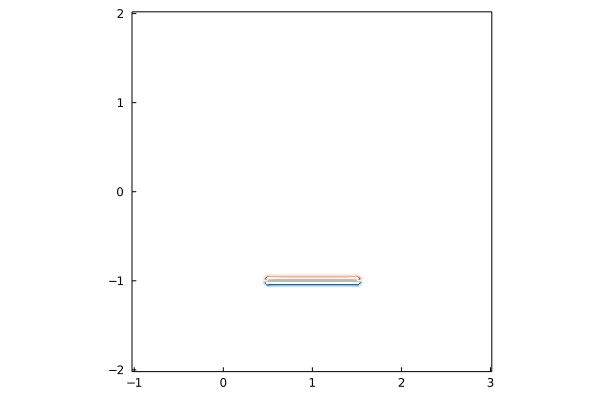

In [63]:
@gif for i = 1:10:length(uhist)
    plot(xg,yg,vorticity(uhist[i],sys),levels=range(-10,10,length=30), color = :RdBu,clim=(-10,10))
    plot!(bl)
end

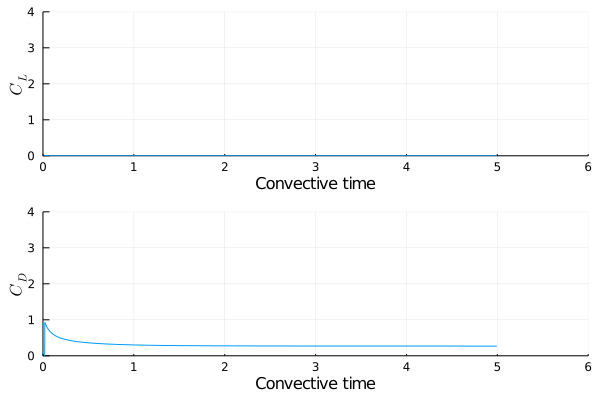

In [64]:
plt = plot(layout = (2,1), size = (600, 400))
plot!(plt[1],thist,2*fy[1],xlim=(0,6),ylim=(0,4),xlabel="Convective time",ylabel="\$C_L\$",legend=false)
plot!(plt[2],thist,2*fx[1],xlim=(0,6),ylim=(0,4),xlabel="Convective time",ylabel="\$C_D\$",legend=false)
plt

In [65]:
ψ = zero(uhist[1])
ψ .= streamfunction(uhist[end],sys) .+ sys.U∞[1]*yg';

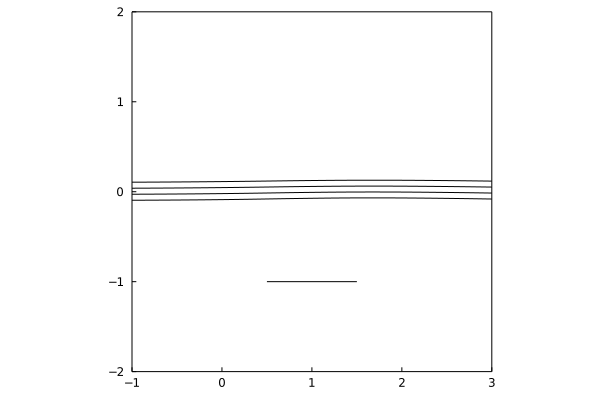

In [66]:
plot(xg,yg,ψ,levels=range(-1,3,length=31), color = :black,clim=(-0.25,0.25),xlim=(-1,3),ylim=(-2,2))
plot!(bl,fillcolor=:black,linecolor=:black)